In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and Cleaning

Link to the dataset : https://www.kaggle.com/mirosval/personal-cars-classifieds

In [4]:
carData = pd.read_csv("all_anonymized_2015_11_2017_03.csv")

In [5]:
carData.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.915376+00,2016-01-27 20:40:15.46361+00,2072.54
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,NaN,None,auto,5,5,diesel,2015-11-14 18:10:06.924123+00,2016-01-27 20:40:15.46361+00,10547.74
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.936239+00,2016-01-27 20:40:15.46361+00,4293.12
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.954319+00,2016-01-27 20:40:15.46361+00,1332.35


In [6]:
carData.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [7]:
carData = carData.drop(columns =['model','color_slug', 'stk_year'])

In [8]:
carData['date_created'] = carData['date_created'].str.slice(0, 10)
carData['date_last_seen'] = carData['date_last_seen'].str.slice(0, 10)

In [9]:
carData = carData[carData['body_type'].notna()]
carData = carData[carData['fuel_type'].notna()]

In [10]:
carData['body_type'].value_counts()

compact         241948
other           122159
coupe            68738
stationwagon     68092
van              30728
offroad          21835
sedan            19149
convertible       5303
transporter       4440
Name: body_type, dtype: int64

In [11]:
carData['seat_count'].value_counts()

None     237765
5.0      160410
5         13172
0.0       11322
7.0        9805
4.0        9043
4          6372
3.0        4346
2.0        3841
2          2869
7          2467
3          1729
9.0        1721
6.0        1517
8.0         886
6           462
9           380
1.0         190
8           156
1            11
21.0          9
50.0          5
14.0          5
57            4
18.0          4
51.0          4
29.0          3
52.0          3
17.0          3
16.0          3
15.0          3
81.0          3
44.0          2
13.0          2
32.0          2
33.0          2
36.0          2
17            2
49.0          2
53.0          2
55.0          2
57.0          2
58.0          2
512.0         2
10.0          1
517.0         1
30.0          1
19.0          1
23.0          1
25.0          1
515.0         1
43.0          1
54.0          1
59.0          1
85.0          1
138.0         1
45.0          1
Name: seat_count, dtype: int64

In [12]:
carData['door_count'].value_counts()

None    233523
5.0     160334
4.0      17846
5        13231
3.0       9338
0.0       7668
2         7290
4         7053
3         4242
2.0       3839
6.0        229
1.0         89
6           41
7.0         15
55.0         9
1            8
58.0         2
9.0          2
8.0          2
49.0         1
45.0         1
17.0         1
7            1
22.0         1
Name: door_count, dtype: int64

In [13]:
#drop all the None values
carData = carData[carData['seat_count'] != 'None']
carData = carData[carData['door_count'] != 'None']

#convert everything to numeric
carData[['seat_count', 'door_count']] = carData[['seat_count', 'door_count']].apply(pd.to_numeric)

carData = carData[carData['seat_count'] <= 9] #drop values greater than 9
carData['seat_count'] = carData['seat_count'].astype(np.int64)
carData = carData[carData['door_count'] <= 7] #drop values greater than 7
carData['door_count'] = carData['door_count'].astype(np.int64)

In [14]:
carData['seat_count'].value_counts().sort_index()

0      8629
1       198
2      5095
3      5251
4     15148
5    170986
6      1893
7     12023
8       991
9      2018
Name: seat_count, dtype: int64

Text(0.5, 1.0, 'Car Seat Counts')

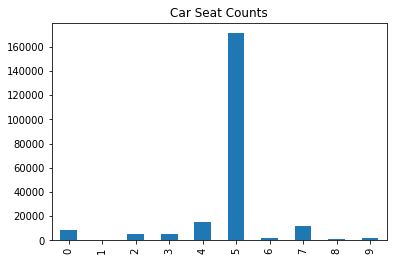

In [15]:
carData['seat_count'].value_counts().sort_index().plot(kind ='bar')
plt.title("Car Seat Counts")

In [16]:
carData['door_count'].value_counts().sort_index()

0      7653
1        85
2     10010
3     12587
4     23968
5    167650
6       264
7        15
Name: door_count, dtype: int64

Text(0.5, 1.0, 'Car Door Counts')

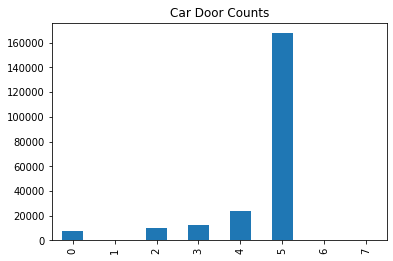

In [17]:
carData['door_count'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Car Door Counts")

In [18]:
carData['maker'] = carData['maker'].fillna(carData['maker'].mode()[0])
carData['transmission'] = carData['transmission'].fillna(carData['transmission'].mode()[0])

carData['manufacture_year'] = carData['manufacture_year'].fillna(carData['manufacture_year'].mode()[0])
carData['manufacture_year'] = carData['manufacture_year'].astype(np.int64)

carData = carData[carData['mileage'] != 0] # remove cars without any mileage
carData['mileage'] = carData['mileage'].fillna(carData['mileage'].mean())
carData['mileage (log)'] = np.log(carData['mileage'])
carData = carData.drop(columns=['mileage'])

carData['engine_displacement'] = carData['engine_displacement'].fillna(carData['engine_displacement'].mean())
carData['engine_power'] = carData['engine_power'].fillna(carData['engine_power'].mean())
carData['engine_displacement (log)'] = np.log(carData['engine_displacement'])
carData = carData.drop(columns=['engine_displacement'])

Text(0.5, 1.0, 'Automatic and Manual Car Counts')

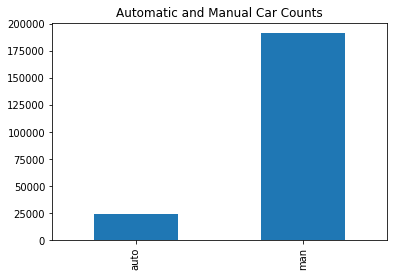

In [19]:
carData['transmission'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Automatic and Manual Car Counts")

In [20]:
carData[['date_created','date_last_seen']] = carData[['date_created','date_last_seen']].apply(pd.to_datetime)
carData['ad_day_count'] = (carData['date_last_seen'] - carData['date_created']).dt.days
carData = carData.drop(columns =['date_created','date_last_seen'])

In [21]:
carData.isnull().sum()

maker                        0
manufacture_year             0
engine_power                 0
body_type                    0
transmission                 0
door_count                   0
seat_count                   0
fuel_type                    0
price_eur                    0
mileage (log)                0
engine_displacement (log)    0
ad_day_count                 0
dtype: int64

In [22]:
carData.head(10)

,maker,manufacture_year,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,mileage (log),engine_displacement (log),ad_day_count
507,mercedes-benz,2011,120.0,van,man,5,5,diesel,22168.76,12.223878,7.669962,74
577,skoda,2007,96.0,van,man,5,9,diesel,8475.20,12.409013,7.808323,74
583,skoda,2005,128.0,van,man,5,8,diesel,9215.40,12.421184,7.808323,74
898,ford,2011,103.0,van,man,5,5,diesel,9437.45,11.830040,7.600902,74
972,skoda,2016,79.0,van,man,5,5,diesel,4441.15,12.055250,7.599401,74
1007,hyundai,2002,90.0,van,man,5,5,gasoline,1073.28,12.111762,7.492760,74
1038,skoda,2016,55.0,van,man,3,2,diesel,5162.84,11.716307,7.286876,74
1079,chrysler,2012,214.0,van,auto,5,7,gasoline,18467.80,11.718312,8.189800,74
1320,skoda,2004,96.0,van,man,4,6,diesel,8845.30,11.957611,7.824046,74
1603,fiat,2006,77.0,van,man,4,5,diesel,3515.91,11.955192,7.554859,74


In [23]:
carData = pd.concat([carData,pd.get_dummies(carData.maker)],axis="columns")
carData = carData.drop(columns=['maker'])

In [24]:
carData = carData.drop(columns=['manufacture_year'])

In [25]:
carData = pd.concat([carData,pd.get_dummies(carData.body_type)],axis="columns")
carData = carData.drop(columns=['body_type'])

In [26]:
carData['transmission'] = carData['transmission'].map( {'man': 1, 'auto': 0} ).astype(int)

In [27]:
carData = pd.concat([carData,pd.get_dummies(carData.door_count,prefix='door_count')],axis="columns")
carData = carData.drop(columns=['door_count'])

In [28]:
carData = pd.concat([carData,pd.get_dummies(carData.seat_count,prefix='seat_count')],axis="columns")
carData = carData.drop(columns=['seat_count'])

In [29]:
carData = pd.concat([carData,pd.get_dummies(carData.fuel_type)],axis="columns")
carData = carData.drop(columns=['fuel_type'])

In [30]:
carData.head(10)

,engine_power,transmission,price_eur,mileage (log),engine_displacement (log),ad_day_count,alfa-romeo,aston-martin,audi,bentley,...,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,cng,diesel,electric,gasoline,lpg
507,120.0,1,22168.76,12.223878,7.669962,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
577,96.0,1,8475.20,12.409013,7.808323,74,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
583,128.0,1,9215.40,12.421184,7.808323,74,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
898,103.0,1,9437.45,11.830040,7.600902,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
972,79.0,1,4441.15,12.055250,7.599401,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1007,90.0,1,1073.28,12.111762,7.492760,74,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1038,55.0,1,5162.84,11.716307,7.286876,74,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1079,214.0,0,18467.80,11.718312,8.189800,74,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1320,96.0,1,8845.30,11.957611,7.824046,74,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1603,77.0,1,3515.91,11.955192,7.554859,74,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [31]:
carData.shape

(215738, 84)

In [32]:
carDataSample = carData.sample(n = 25000, random_state=0)
carDataSample = carDataSample.loc[:, (carDataSample != 0).any(axis=0)]

_Regress Sample_

In [33]:

X = carDataSample.loc[:, carDataSample.columns != 'price_eur']
y = np.log(carDataSample['price_eur'])

# Regression Algorithms

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [36]:
dectree_params = {'max_features': [2, 5, 10],
                  'n_estimators':[100, 200, 300, 500],
                  'max_samples':[0.1, 0.5, 1],
                  'random_state':[0]
                 }
dectreegrid = GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),random_state=0), param_grid = dectree_params, cv = 5, iid=False)
dectreegrid.fit(X_train, y_train)

print(dectreegrid.best_params_)
print("Accuracy on training set: {:.4f}".format(dectreegrid.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dectreegrid.score(X_test, y_test)))

y_preddectree = dectreegrid.predict(X_test)
print("R^2: ", r2_score(y_test, y_preddectree))

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100, 'random_state': 0}
Accuracy on training set: 0.3059
Accuracy on test set: 0.2999
R^2:  0.29985928043177


In [37]:
randomforest = RandomForestRegressor(max_depth=5,random_state=0)
bagrandomforest = BaggingRegressor(randomforest, random_state=0)
bagrandomforest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(bagrandomforest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(bagrandomforest.score(X_test, y_test)))

y_predrandomforest = bagrandomforest.predict(X_test)
print("R^2: ", r2_score(y_test, y_predrandomforest))

Accuracy on training set: 0.6360
Accuracy on test set: 0.6428
R^2:  0.6428171054214139


In [38]:
dectreepastegrid = GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),random_state=0,bootstrap=False), param_grid = dectree_params, cv = 5, iid=False)
dectreepastegrid.fit(X_train, y_train)

print(dectreepastegrid.best_params_)
print("Accuracy on training set: {:.4f}".format(dectreepastegrid.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dectreepastegrid.score(X_test, y_test)))

y_preddectreepaste = dectreepastegrid.predict(X_test)
print("R^2: ", r2_score(y_test, y_preddectreepaste))

{'max_features': 10, 'max_samples': 0.5, 'n_estimators': 100, 'random_state': 0}
Accuracy on training set: 0.3055
Accuracy on test set: 0.2995
R^2:  0.2994990415569352


In [39]:
bagrandomforestpaste = BaggingRegressor(randomforest, random_state=0,bootstrap=False)
bagrandomforestpaste.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(bagrandomforestpaste.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(bagrandomforestpaste.score(X_test, y_test)))

y_predrandomforestpaste = bagrandomforestpaste.predict(X_test)
print("R^2: ", r2_score(y_test, y_predrandomforestpaste))

Accuracy on training set: 0.6305
Accuracy on test set: 0.6367
R^2:  0.6367223866963034


In [40]:
dectreeada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.5, random_state=0)
dectreeada.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(dectreeada.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dectreeada.score(X_test, y_test)))

y_preddectreeada = dectreeada.predict(X_test)
print("R^2: ", r2_score(y_test, y_preddectreeada))

Accuracy on training set: -0.1698
Accuracy on test set: -0.1747
R^2:  -0.174668388294275


In [41]:
adarandomforest = AdaBoostRegressor(randomforest, n_estimators=200, learning_rate=0.5, random_state=0)
adarandomforest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(adarandomforest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(adarandomforest.score(X_test, y_test)))

y_predrandomforestada = adarandomforest.predict(X_test)
print("R^2: ", r2_score(y_test, y_predrandomforestada))

Accuracy on training set: 0.6303
Accuracy on test set: 0.6139
R^2:  0.6138963844493799


In [42]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))

y_predgbrt = gbrt.predict(X_test)
print("R^2: ", r2_score(y_test, y_predgbrt))

Accuracy on training set: 0.5579
Accuracy on test set: 0.5373
R^2:  0.5373404528451966


# PCA with Project 1 models

In [43]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

pca.fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

<b>Linear Regression</b>

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.4f}".format(lr.score(X_train_new, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test_new, y_test)))

y_predlr = lr.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_predlr))

lr.coef_: [ 1.28970222e-01  1.08515849e-01 -2.35824572e-02 -8.87549832e-02
 -1.26298509e-01  1.46315356e-02  5.59663432e-02 -1.98769889e-02
  1.26979095e-01  9.96509984e-02 -1.28030913e-01  7.42721148e-02
 -4.01377891e-03 -2.64584411e-02  4.51901005e-02  3.65276454e-02
 -4.98337871e-02  1.10113691e-03  1.52834651e-02 -4.59285536e-02
  7.14868701e-04  2.59583836e-03  2.12567273e-02  1.09543248e-02
 -2.09630231e-02  5.29614697e-03  2.24609048e-02  3.65613101e-02
  6.11144965e-03  1.88073564e-02  2.21787200e-02 -2.28794908e-02
  2.37695137e-02 -8.30715784e-04 -4.45589777e-03 -1.53235170e-03
 -1.22316232e-02  1.83800031e-02  2.27369389e-02 -7.35252296e-03
 -4.88813158e-03 -1.49808371e-02 -1.26783937e-02 -4.84090116e-04
 -1.30290141e-02  5.31757462e-04 -9.70616781e-07  6.08219537e-03
  2.18571016e-02 -1.99030676e-02  9.00796404e-03  2.58571359e-03
 -4.27463185e-02 -2.37830197e-02 -3.08341956e-02 -2.36548369e-03
  1.59937262e-02  2.72325180e-02 -1.04574865e-02  4.32438156e-02
 -5.41324396e-0

<b>Lasso Regression</b>

In [45]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
lasso_reg = Lasso()

lasso = GridSearchCV(lasso_reg,lasso_params,cv=2,return_train_score=True)
lasso.fit(X_train_new,y_train)

print(lasso.cv_results_)
print(lasso.best_estimator_)
print('Train score: {:.4f}'.format(lasso.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test_new, y_test)))

y_pred_lasso = lasso.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_lasso))

{'mean_fit_time': array([0.59762347, 0.10650969, 0.02100241, 0.0180037 , 0.01700258]), 'std_fit_time': array([1.15801096e-02, 1.85017586e-02, 1.99925900e-03, 2.38418579e-07,
       2.38418579e-07]), 'mean_score_time': array([0.00299978, 0.00250101, 0.00250053, 0.00199986, 0.00200081]), 'std_score_time': array([1.19209290e-06, 4.99248505e-04, 4.99725342e-04, 7.15255737e-07,
       4.76837158e-07]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([-2.18761634e+01,  4.30263331e-01,  4.54797329e-01,  3.12252721e-01,
       -1.01362112e-05]), 'split1_test_score': array([-1.69098332e+00,  4.51278097e-01,  4.63218759e-01,  3.17057707e-01,
       -1.00089162e-05]), 'mean_test_score': array([-1.17835734e+01,  4.40770714e-01,  4.59008044e-01,  3.14655214e-

<b>Ridge Regression</b>

In [46]:
from  sklearn.linear_model import Ridge

ridge_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
ridge_reg = Ridge()


ridge = GridSearchCV(ridge_reg,ridge_params,cv=2,return_train_score=True)
ridge.fit(X_train_new,y_train)

print(ridge.cv_results_)
print(ridge.best_estimator_)
print('Train score: {:.4f}'.format(ridge.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_new, y_test)))

y_pred_ridge = ridge.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_ridge))

{'mean_fit_time': array([0.02128732, 0.01850188, 0.01950049, 0.01900232, 0.01950228]), 'std_fit_time': array([1.28829479e-03, 4.99844551e-04, 4.99010086e-04, 8.34465027e-07,
       5.00798225e-04]), 'mean_score_time': array([0.00275683, 0.0029999 , 0.00200021, 0.00299919, 0.00300002]), 'std_score_time': array([2.44855881e-04, 1.19209290e-07, 1.19209290e-07, 1.07288361e-06,
       0.00000000e+00]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([-69.56869377, -69.52591809, -69.10067036, -65.08564057,
       -40.00503651]), 'split1_test_score': array([-11.86341541, -11.85856029, -11.81017446, -11.34235544,
        -7.8849761 ]), 'mean_test_score': array([-40.71605459, -40.69223919, -40.45542241, -38.21399801,
       -23.9450063 ]), 'std_test_score

<b>Polynomial Regression</b>

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_new)
X_test_poly = poly.transform(X_test_new)
lr.fit(X_train_poly, y_train)

print("Train score: {:.4f}".format(lr.score(X_train_poly, y_train)))
print("Test score: {:.4f}".format(lr.score(X_test_poly, y_test)))

Train score: 0.4757
Test score: 0.4638


<b>KNN Regressor</b>

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors':[41, 43, 45, 47, 49],
              'p': [1]}
knn_reg = KNeighborsRegressor()

knn = GridSearchCV(knn_reg,knn_params,cv=2,return_train_score=True)
knn.fit(X_train_new, y_train)

print(knn.cv_results_)
print(knn.best_estimator_)
print('Train score: {:.4f}'.format(knn.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_new,y_test)))

y_pred_knn = knn.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_knn))

{'mean_fit_time': array([0.04150093, 0.04500365, 0.05400145, 0.04100287, 0.04803622]), 'std_fit_time': array([0.00549924, 0.00100088, 0.00599825, 0.00100029, 0.00103295]), 'mean_score_time': array([ 9.15265989,  9.35702682,  9.80105543,  9.80634308, 10.01579499]), 'std_score_time': array([0.43726587, 0.31874275, 0.07948732, 0.38198996, 0.11672187]), 'param_n_neighbors': masked_array(data=[41, 43, 45, 47, 49],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_p': masked_array(data=[1, 1, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 41, 'p': 1}, {'n_neighbors': 43, 'p': 1}, {'n_neighbors': 45, 'p': 1}, {'n_neighbors': 47, 'p': 1}, {'n_neighbors': 49, 'p': 1}], 'split0_test_score': array([0.46785609, 0.462293  , 0.4596614 , 0.45630072, 0.45276708]), 'split1_test_score': array([0.46370901, 0.45978788, 0.45688779, 0.45427047, 0.451488

<b>Simple SVM</b>

In [49]:
from sklearn.svm import SVR, LinearSVR

svm_simple_params = {'C':[0.01,0.1,1,10,100],
                     'epsilon':[0.01,0.1,1,10,100]
                    }

svm_simple_reg = LinearSVR()
svm_simple = GridSearchCV(estimator=svm_simple_reg,param_grid=svm_simple_params,cv=2,return_train_score=True)

svm_simple.fit(X_train_new, y_train)

print(svm_simple.cv_results_)
print(svm_simple.best_estimator_)
print('Train score: {:.4f}'.format(svm_simple.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(svm_simple.score(X_test_new,y_test)))

y_pred_svm_simple = svm_simple.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_svm_simple))

{'mean_fit_time': array([1.77096069, 0.83706152, 0.21751559, 0.02950156, 0.01950097,
       3.44091952, 2.7310971 , 0.46681082, 0.03050268, 0.01800096,
       4.5175432 , 3.53217793, 2.51401365, 0.02800262, 0.01850188,
       4.85626745, 4.71004009, 3.4335798 , 0.02900207, 0.02200174,
       5.09444261, 5.02496564, 3.62213373, 0.03500223, 0.01950037]), 'std_fit_time': array([2.33737350e-01, 1.23009562e-01, 6.50012493e-03, 3.50010395e-03,
       5.00202179e-04, 2.09510326e-03, 1.42949820e-02, 1.22233033e-01,
       5.49972057e-03, 1.19209290e-07, 2.82827616e-02, 5.57000637e-02,
       4.36777472e-01, 3.00109386e-03, 5.00082970e-04, 6.87215328e-02,
       1.48742199e-02, 7.65597820e-03, 3.00014019e-03, 1.00016594e-03,
       9.65170860e-02, 1.78900957e-02, 1.14018679e-01, 9.00125504e-03,
       4.99129295e-04]), 'mean_score_time': array([0.00200105, 0.00250196, 0.00200105, 0.00200093, 0.00200081,
       0.00250101, 0.00200057, 0.0024997 , 0.00250101, 0.00300062,
       0.0020014 , 0.0025

<b>SVM with kernels</b>

In [50]:
svm_rbf_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['rbf']
                 }

svm_rbf_reg = SVR()
svm_rbf = GridSearchCV(svm_rbf_reg,svm_rbf_params,cv=2,return_train_score=True)

svm_rbf.fit(X_train_new, y_train)

print(svm_rbf.cv_results_)
print(svm_rbf.best_estimator_)
print('Train score: {:.4f}'.format(svm_rbf.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(svm_rbf.score(X_test_new,y_test)))

y_pred_svm_rbf = svm_rbf.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_svm_rbf))

{'mean_fit_time': array([2.17138147, 3.09742916, 4.92754912, 3.36204159, 3.33995938,
       4.61927879, 7.53167653, 4.22281814, 6.2589159 ]), 'std_fit_time': array([0.02310967, 0.1238085 , 0.02808261, 0.26099789, 0.41880679,
       0.03849351, 0.0487082 , 0.20246124, 0.47584605]), 'mean_score_time': array([1.34087729, 1.88232124, 2.85550845, 1.2034862 , 1.70011568,
       2.54726291, 1.38764524, 1.68657255, 2.80170977]), 'std_score_time': array([0.10878611, 0.01196373, 0.00570428, 0.00360417, 0.0965991 ,
       0.07108378, 0.08604074, 0.02140594, 0.26544154]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            

In [51]:
'''
svm_poly_params = {'C':[1,10,100],
                  'gamma':[.01,.1,1],
                  'kernel':['poly']
                 }

svm_poly_reg = SVR()
svm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)

svm_poly.fit(X_train_new, y_train)

print(svm_poly.cv_results_)
print(svm_poly.best_estimator_)
print('Train score: {:.4f}'.format(svm_poly.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(svm_poly.score(X_test_new,y_test)))

y_pred_svm_poly = svm_poly.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_svm_poly))
'''

'\nsvm_poly_params = {\'C\':[1,10,100],\n                  \'gamma\':[.01,.1,1],\n                  \'kernel\':[\'poly\']\n                 }\n\nsvm_poly_reg = SVR()\nsvm_poly = GridSearchCV(svm_poly_reg,svm_poly_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_poly.fit(X_train_new, y_train)\n\nprint(svm_poly.cv_results_)\nprint(svm_poly.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_poly.score(X_train_new,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_poly.score(X_test_new,y_test)))\n\ny_pred_svm_poly = svm_poly.predict(X_test_new)\nprint("R^2: ", r2_score(y_test, y_pred_svm_poly))\n'

In [52]:
'''
svm_linear_params = {'C':[1,10,100],
                     'gamma':[.01,.1,1],
                     'kernel':['linear']
                    }

svm_linear_reg = SVR()
svm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)

svm_linear.fit(X_train_new, y_train)

print(svm_linear.cv_results_)
print(svm_linear.best_estimator_)
print('Train score: {:.4f}'.format(svm_linear.score(X_train_new,y_train)))
print('Test score: {:.4f}'.format(svm_linear.score(X_test_new,y_test)))

y_pred_svm_linear = svm_linear.predict(X_test_new)
print("R^2: ", r2_score(y_test, y_pred_svm_linear))
'''

'\nsvm_linear_params = {\'C\':[1,10,100],\n                     \'gamma\':[.01,.1,1],\n                     \'kernel\':[\'linear\']\n                    }\n\nsvm_linear_reg = SVR()\nsvm_linear = GridSearchCV(svm_linear_reg,svm_linear_params,cv=2,return_train_score=True,n_jobs=-1)\n\nsvm_linear.fit(X_train_new, y_train)\n\nprint(svm_linear.cv_results_)\nprint(svm_linear.best_estimator_)\nprint(\'Train score: {:.4f}\'.format(svm_linear.score(X_train_new,y_train)))\nprint(\'Test score: {:.4f}\'.format(svm_linear.score(X_test_new,y_test)))\n\ny_pred_svm_linear = svm_linear.predict(X_test_new)\nprint("R^2: ", r2_score(y_test, y_pred_svm_linear))\n'

# Deep Learning Models

In [53]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [55]:
import tensorflow as tf

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
dlmodel = Sequential()
dlmodel.add(Dense(82, input_dim=82, kernel_initializer='normal', activation='relu'))
dlmodel.add(Dense(21, kernel_initializer='normal', activation='relu'))
dlmodel.add(Dense(1, kernel_initializer='normal'))

dlmodel.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
dlmodel.fit(X_train, y_train, epochs = 1, batch_size = 20)

dlmodel.evaluate(X_test, y_test)

y_train_predictdl = dlmodel.predict(X_train)
y_test_predictdl = dlmodel.predict(X_test)

print('Train score: {:.4f}'.format(r2_score(y_train, y_train_predictdl)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_test_predictdl)))

196/196 [==============================] - 0s 694us/step - loss: 0.2474 - mse: 0.2474
Train score: 0.5019
Test score: 0.5368


# Conclusion

<b>The PCA made the linear regression, Lasso Regression, and Ridge Regression perform a little worse. The PCA made KNN and SVM perform better. SVM with the RBF kernel performed very well with an R^2 value of 0.69</b>